In [49]:
#Carregando os dados

import pandas as pd
import numpy as np

reco = pd.read_csv('../dados/reconhecimento_atividade_humana.csv')

reco.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Activity
0,-1.028626,-0.105919,-0.264525,-1.235359,-0.162986,-0.483125,1.0
1,-1.046406,-0.061666,-0.255959,-1.074173,-0.275747,-0.387487,1.0
2,-1.009987,-0.054528,-0.205398,-0.803832,-0.282078,-0.316955,1.0
3,-0.988288,-0.080090,-0.184195,-0.735864,-0.302880,-0.239320,1.0
4,-0.933698,-0.110635,-0.185413,-0.703047,-0.189211,-0.102410,1.0


In [50]:
# Renomeando as colunas para melhorar a compreensão

reco.rename(columns=
            {"Feature_1":"x_baixo", 
             "Feature_2":"y_esquerda", 
             "Feature_3":"z_frente", 
             "Feature_4":"x_cima",
             "Feature_5":"y_direita",
             "Feature_6":"z_tras"}, inplace=True)

# Criando uma cópia dos dados para não manipular demais os dados de treino

reco_df = reco.copy()
reco_df.head(7)

,x_baixo,y_esquerda,z_frente,x_cima,y_direita,z_tras,Activity
0,-1.028626,-0.105919,-0.264525,-1.235359,-0.162986,-0.483125,1.0
1,-1.046406,-0.061666,-0.255959,-1.074173,-0.275747,-0.387487,1.0
2,-1.009987,-0.054528,-0.205398,-0.803832,-0.282078,-0.316955,1.0
3,-0.988288,-0.080090,-0.184195,-0.735864,-0.302880,-0.239320,1.0
4,-0.933698,-0.110635,-0.185413,-0.703047,-0.189211,-0.102410,1.0
5,-0.928483,-0.136658,-0.179933,-0.769111,-0.095082,-0.083583,1.0
6,-0.882026,-0.129124,-0.160372,-0.733306,0.019948,-0.116381,1.0


array([[<Axes: title={'center': 'x_baixo'}>,
        <Axes: title={'center': 'y_esquerda'}>,
        <Axes: title={'center': 'z_frente'}>],
       [<Axes: title={'center': 'x_cima'}>,
        <Axes: title={'center': 'y_direita'}>,
        <Axes: title={'center': 'z_tras'}>],
       [<Axes: title={'center': 'Activity'}>, <Axes: >, <Axes: >]],
      dtype=object)

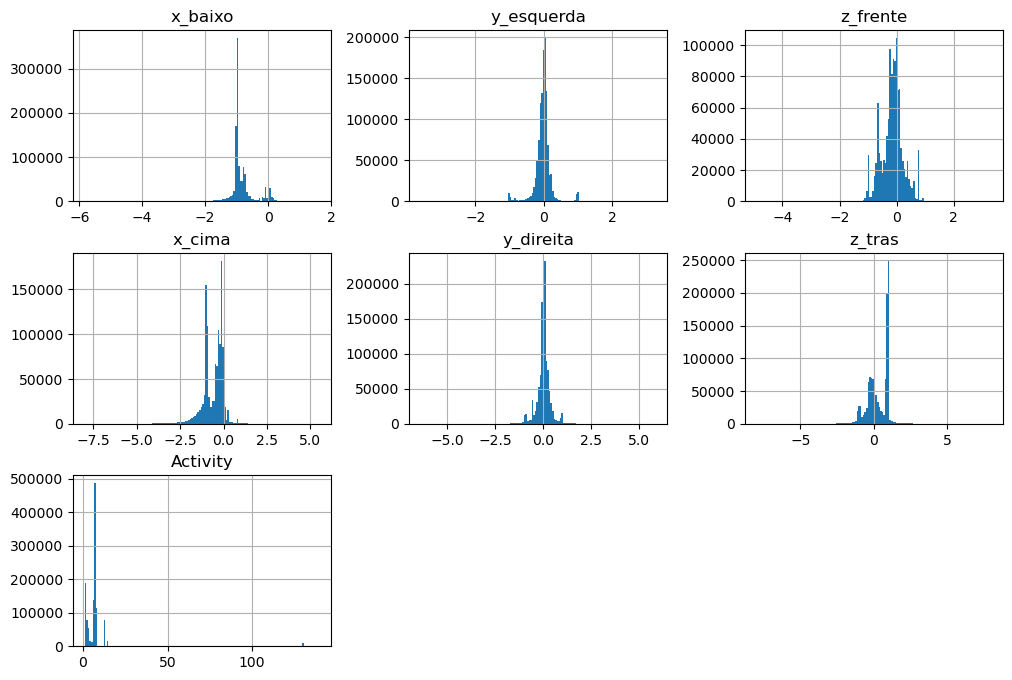

In [51]:
reco_df.hist(bins=150, figsize=(12, 8))

In [52]:
# Criando os dados de treino e teste padrão e estratificados

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Realizando um split padrão para averiguar mais abaixo o impacto da estratificação
reco_train, reco_test = train_test_split(reco_df, test_size=0.3, random_state=42)

# Dados estratificados
reco_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Passando os dados estratificados para um dataframe
for reco_train_index, reco_test_index in reco_split.split(reco_df, reco_df.Activity):
    strat_reco_train = reco_df.loc[reco_train_index]
    strat_reco_test = reco_df.loc[reco_test_index]

In [53]:
# Visualizando o impacto da estratificação

# Colocando tudo em um dataframe
reco_target_index = reco_df.Activity.value_counts().index
reco_target_prop = reco_df.Activity.value_counts()/len(reco_df)
reco_target_test_strat_prop = strat_reco_test.Activity.value_counts()/len(strat_reco_test)

# Criando o dataframe de comparação
new_df = pd.DataFrame(data={
    'Atividade':reco_target_index, 
    'proporcao_no_original':reco_target_prop, 
    'proporcao_no_teste_estratificado':reco_target_test_strat_prop
    })

In [54]:
# Acrescentando uma nova coluna sem alterar a ordem 
new_df['proporcao_no_teste_padrao'] = reco_test.Activity.value_counts()/len(reco_test)

# Começando uma transformação para ajustar os valores para %
for i in list(new_df)[1:]:
    new_df[i] = (new_df[i]*100).round(4)

# Novas colunas mostrando a diferença % entre o set proporcional de treino e o set padrão de treino
new_df['diferenca_original_estrato'] = (new_df['proporcao_no_original'] - new_df['proporcao_no_teste_estratificado']).round(4)
new_df['diferenca_original_padrao'] = (new_df['proporcao_no_original'] - new_df['proporcao_no_teste_padrao']).round(4)

# Ajustando o legibilidade de leitura em algumas colunas
for i in list(new_df)[1:4]: # Ignorando target e as colunas de diferença
    new_df[i] = new_df[i].astype('str')+'%'

# Exibindo o dataframe sem 'Atividade' repetida no index
new_df.reset_index(drop=True)

,Atividade,proporcao_no_original,proporcao_no_teste_estratificado,proporcao_no_teste_padrao,diferenca_original_estrato,diferenca_original_padrao
0,7.0,40.7822%,40.7821%,40.7318%,0.0001,0.0504
1,1.0,15.8831%,15.883%,15.9221%,0.0001,-0.0390
2,6.0,11.6568%,11.6567%,11.7109%,0.0001,-0.0541
3,8.0,9.4876%,9.4874%,9.4626%,0.0002,0.0250
4,13.0,6.455%,6.455%,6.4274%,0.0000,0.0276
5,2.0,6.4526%,6.4525%,6.4503%,0.0001,0.0023
6,3.0,4.5113%,4.5115%,4.4791%,-0.0002,0.0322
7,14.0,1.4251%,1.4251%,1.4246%,0.0000,0.0005
8,4.0,1.3342%,1.3344%,1.3439%,-0.0002,-0.0097
9,5.0,1.0966%,1.0966%,1.1025%,0.0000,-0.0059


In [55]:
# Voltando a trabalhar na classificação dos dados

# Ajustando set de treino e teste
X_train = strat_reco_train[strat_reco_train.columns[:-1]]
y_train = strat_reco_train.Activity

X_test = strat_reco_test[strat_reco_test.columns[:-1]]
y_test = strat_reco_test.Activity

In [60]:
# Voltando a trabalhar na classificação dos dados

from sklearn.ensemble import RandomForestClassifier

# Fixando o resultado do RFC apenas para questões didáticas
rfc = RandomForestClassifier(random_state=42)

# Treinando o estimador
# Treinado separadamente de outros comandos devido ao seu tempo de execução
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
y_pred_rfc = rfc.predict(X_test)

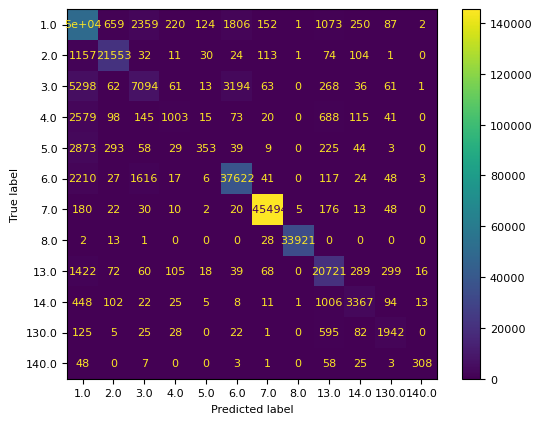

In [85]:
# O visual final ficou horrível, por isso vamos analisar visualmente

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Apesar do visual não ser muito legível, não é difícil entender que o resultado final é bem problemático
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc)
plt.rc('font', size=3)
plt.show()

In [88]:
# A precisão geral foi de 80,97%, muito abaixo do aceitável
from sklearn.metrics import precision_score

# Usei macro pois a precisão realiza uma média não ponderada e eu queria entender a precisão sem peso das classes
precision_score(y_test, y_pred_rfc, average='macro')

0.8097955077807417

### Novo algoritmo para testes

O RFC não classificou bem e, apesar de conseguir uma taxa de precisão alta, ela não é uma classificação boa principalmente devido à alta taxa de erros em classes como a 3, 4 e 5. Se você observar no DataFrame de propoções, vai notar que as suas % do total, juntos, não chega a 10% do total.

Esse problema de proporção pode acabar fazendo com que o algoritmo se habitue demais a uma determinada classe e quando encontra uma com menos presença no conjunto de dados, não classifique corretamente pela falta de treino nela.

Apesar de entender que existe uma maneira de alterar o peso das classes, devido ao tempo de execução do RFC (que chegou à 13 minutos na minha máquina!) preferi alterar o algoritmo para tentar realizar a classificação. Para essa próxima etapa vou verificar a precisão do KNN.

#### Uso de KNN

Abaixo avalio a correlação entre os atributos, mas eles estão extremamente povoadas pelo tamanho do conjunto de dados. Um problema que enfrento aqui.

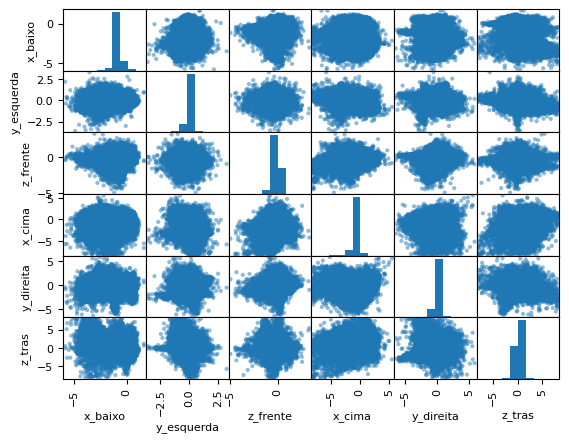

<Figure size 1200x800 with 0 Axes>

In [96]:
# Plotando a correlação entre os atributos

from pandas.plotting import scatter_matrix

# Essa célula demora mais de 2 minutos para rodar
scatter_matrix(reco_df[list(reco_df)[:-1]])
plt.figure(figsize=(12, 8))
plt.show()

In [97]:
# Aplicando um novo estimador

from sklearn.neighbors import KNeighborsClassifier

# Alterando um hiper parâmetro. No primeiro teste com tudo em padrão a precisão foi de 77%
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [102]:
# Realizando a validação cruzada

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn,X_train, y_train, scoring='precision_macro', cv=3)

In [103]:
# Scores baixos com relação ao RFC
scores

array([0.77547788, 0.77378121, 0.77276232])

In [98]:
# Realizando a predição separadamente devido ao tempo de execução desse comando
y_pred_knn = knn.predict(X_test)

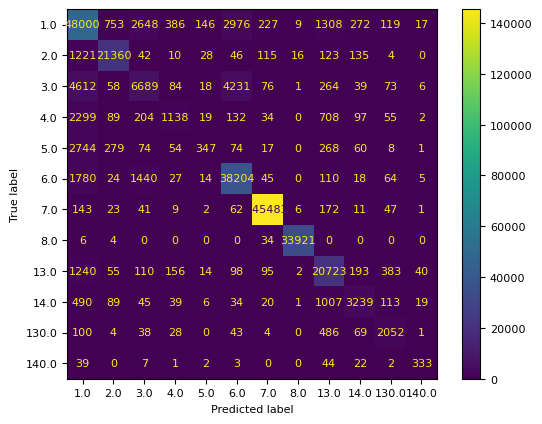

In [99]:
# Plotando visualmente a matriz de confusão

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.rc('font', size=8)
plt.show()

In [100]:
# Calculando a precisão

precision_score(y_test, y_pred_knn, average='macro')

0.7817400329386476

### Considerações finais

Em geral o conjunto de dados é muito grande para um estudo simples de predição. O ideal seria diminuir a quantidade de dados para que haja um melhor aproveitamente de recursos. Com valores entre 20 a 23% de erro na precisão, esses dados precisam ser melhor trabalhados principalmente no quesito 'peso'. Pela ausência proporcional de alguns targets dentro do conjunto de dados, os algoritmos tendem a errar bastante nas classificações deles.

Em geral, as validações são muito importantes para economizar recursos e avaliar correlações é bem proveitoso, mas em dados menos volumosos.